<a href="https://colab.research.google.com/github/Swappy40b/Assignment--3/blob/main/Assignment3AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records

advertising =pd.read_csv("/content/Company_data.csv")
advertising


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
#Shape of our dataset
advertising.shape

(200, 4)

In [ ]:
# Info our dataset
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Describe our dataset
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


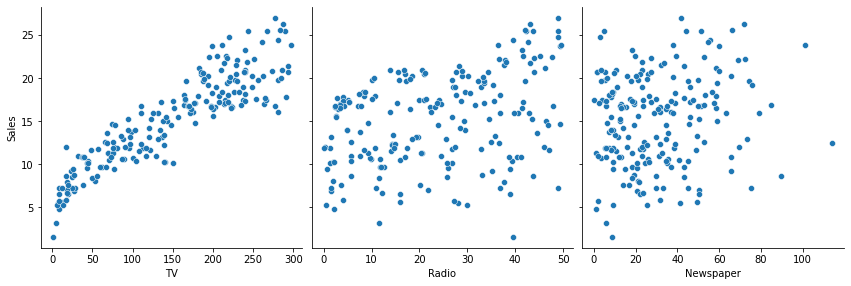

In [1]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd


# Using pairplot we'll visualize the data for correlation
advertising =pd.read_csv("/content/Company_data.csv")
advertising
sns.pairplot(advertising,x_vars=['TV','Radio','Newspaper'],
             y_vars='Sales', size=4, aspect=1,kind='scatter')
plt.show()


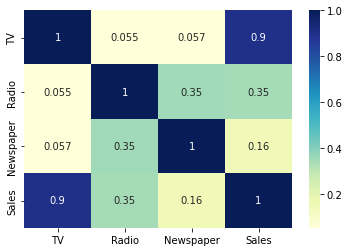

In [4]:
# Visualizing the data using heatmap
sns.heatmap(advertising.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [5]:
# Creating X and y
x=advertising ['TV']
y=advertising['Sales']

In [6]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [7]:
# Take a look at the train dataset
x_train
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [8]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [9]:
x_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [10]:
# Importing Statsmodels.api library from Stamodel package

import statsmodels.api as sm
 
 # Adding a constant to get an intercept
x_train_sm=sm.add_constant(x_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
# Fitting the regression line using 'OLS'
lr=sm.OLS(y_train,x_train_sm).fit()

# Printing the parameters
lr.params


const    6.948683
TV       0.054546
dtype: float64

In [12]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.52e-52
Time:                        07:29:40   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

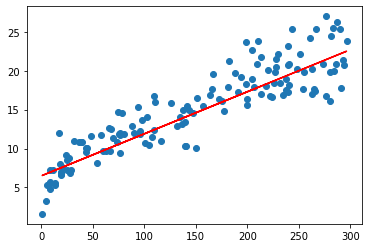

In [13]:
# Visualizing the regression line
plt.scatter(x_train,y_train)
plt.plot(x_train,6.498+0.054*x_train,'r')
plt.show()

In [14]:
# Predicting y_value using train data of X
y_train_pred=lr.predict(x_train_sm)

# Creating residuals from the y_train data and predicted y_data
res=(y_train-y_train_pred)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


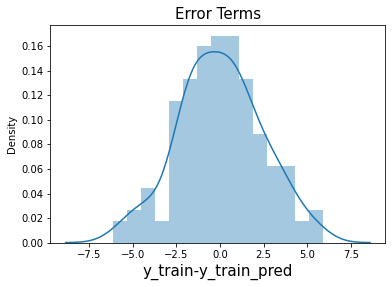

In [15]:
# Plotting the histogram using the residual values
fig=plt.figure()
sns.distplot(res,bins=15)
plt.title("Error Terms",fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

In [18]:
# Adding a constant to X_test
x_test_sm=sm.add_constant(x_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred=lr.predict(x_test_sm)

#printing the first 15 predicated values
y_test_pred

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [20]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared=r2_score(y_test,y_test_pred)
r_squared

0.792103160124566

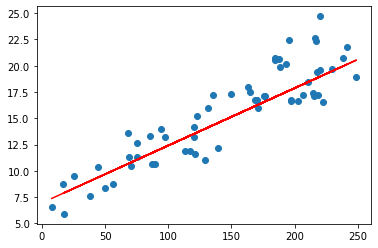

In [21]:
# Visualize the line on the test set
plt.scatter(x_test,y_test)
plt.plot(x_test,y_test_pred,'r')
plt.show()

In [28]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train_lm,x_test_lm,y_train_lm,y_test_lm=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [27]:
#shape of the train set without adding column
x_train_lm.shape

(140, 1)

In [29]:
# Adding additional column to the train and test data
x_train_lm = x_train_lm.values.reshape(-1,1)
x_test_lm = x_test_lm.values.reshape(-1,1)

print(x_train_lm.shape)
print(x_test_lm.shape)

(140, 1)
(60, 1)


In [31]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm=LinearRegression()

# Fit the model using .fit() method
lm.fit(x_train_lm,y_train_lm)

LinearRegression()

In [33]:
# Intercept value
print("Intercept:",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)


Intercept: 6.948683200001357
Slope : [0.05454575]


In [35]:
# Making Predictions of y_value
y_train_pred=lm.predict(x_train_lm)
y_test_pred=lm.predict(x_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8157933136480389
0.7921031601245662
